In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

from ssd_model import SSD300, SSD512
from ssd_utils import PriorUtil
from ssd_utils import load_weights

Using TensorFlow backend.


### Data

#### Pascal VOC

In [2]:
from data_voc import GTUtility
gt_util = GTUtility('data/VOC2007/')
gt_util_train, gt_util_val = gt_util.split(gt_util, split=0.8)
experiment_name = 'ssd512_voc'
#print(gt_util)

#### MS COCO

In [ ]:
from data_coco import GTUtility
gt_util = GTUtility('data/COCO/')
gt_util_train, gt_util_val = gt_util.split(gt_util, split=0.8)
experiment_name = 'ssd512_coco'
#print(gt_util)

### Model

In [3]:
#model = SSD300(num_classes=gt_util.num_classes)
model = SSD512(num_classes=gt_util.num_classes)

weights_path = './checkpoints/201709081909_ssd512_voc/weights.034.h5'

load_weights(model, weights_path)

prior_util = PriorUtil(model)

layer missing zero_padding2d_1
layer missing conv4_3_norm_mbox_priorbox
layer missing fc7_mbox_priorbox
layer missing conv6_2_mbox_priorbox
layer missing conv7_2_mbox_priorbox
layer missing conv8_2_mbox_priorbox
layer missing conv9_2_mbox_priorbox
layer missing conv10_2_mbox_priorbox
layer missing mbox_priorbox


### Prediction

In [4]:
_, inputs, images, data = gt_util_val.sample_random_batch(batch_size=8, input_size=model.image_size)

In [5]:
# plot ground truth
for i in range(len(images)):
    break
    plt.figure(figsize=[8]*2)
    plt.imshow(images[i])
    gt_util.plot_gt(data[i])
    plt.show()

In [6]:
# plot prior boxes
for m in prior_util.prior_maps:
    break
    plt.figure(figsize=[8]*2)
    plt.imshow(images[0])
    m.plot_locations()
    m.plot_boxes([0, 10, 100])
    plt.show()

In [7]:
preds = model.predict(inputs, batch_size=1, verbose=1)

8/8 [==============================] - 1s 117ms/step


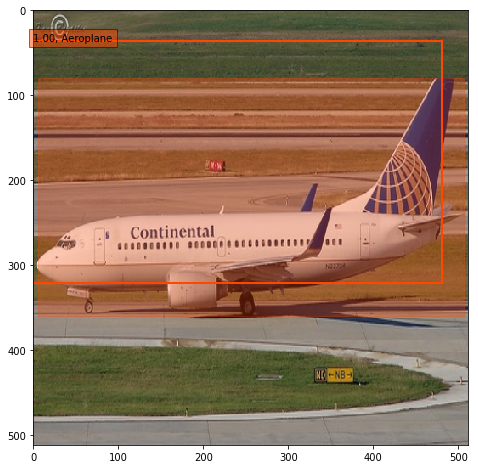

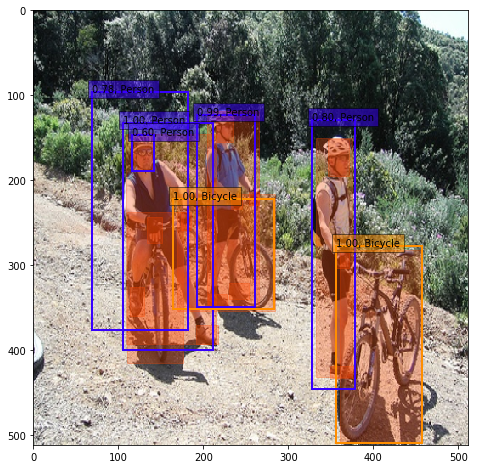

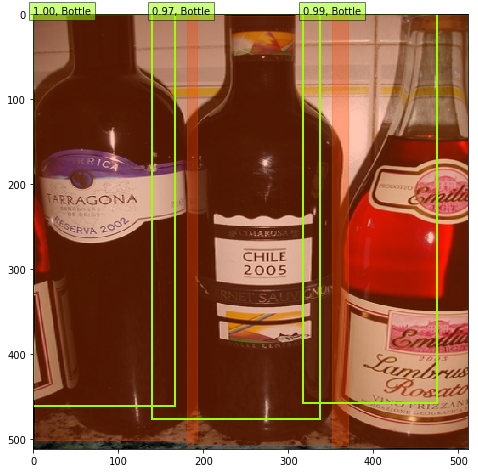

In [8]:
checkdir = os.path.dirname(weights_path)

for fl in glob.glob('%s/result_*' % (checkdir,)):
    #os.remove(fl)
    pass

for i in range(3):
    plt.figure(figsize=[8]*2)
    plt.imshow(images[i])
    res = prior_util.decode(preds[i], confidence_threshold=0.6)
    prior_util.plot_results(res, classes=gt_util.classes, show_labels=True, gt_data=data[i])
    #prior_util.plot_results(res, classes=gt_util.classes, show_labels=True, gt_data=None)
    #plt.savefig('%s/result_%03d.jpg' % (checkdir, i))
    plt.show()

In [ ]:
import pickle

results = []
for i in range(len(preds)):
    res = prior_util.decode(preds[i], confidence_threshold=0.6)
    results.append(res)

test_eval_data = {
    'gt': data,
    'inputs': inputs,
    'images': images,
    'results': results
}

pickle.dump(test_eval_data, open('test_eval_data.pkl','wb'))